# Analyzing Customer Experience Data from  Utility Company 

## Step 1: I am loading the libraries neccesary for this project


In [226]:
import pandas as pd
import nltk
import re
import nltk.corpus
from nltk.corpus import stopwords
from nltk import word_tokenize,NaiveBayesClassifier,classify
from sklearn.model_selection import KFold
from sklearn.metrics import precision_recall_curve
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import precision_recall_fscore_support
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from nltk.sentiment import SentimentIntensityAnalyzer


nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to /Users/sdetti/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sdetti/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Step 2: I am reading in the data and putting it into a dataframe, additionally i am doing some data exploration
### We are also dropping nulls and renaming the columns (feature engineering and selection)

In [227]:
df = pd.read_csv('Customer Review Data.csv', encoding ='utf-8',delimiter=',',encoding_errors ='ignore')

In [228]:
df.head(5)

,Q3 What Can Be Improved,QOS1 Overall Satisfaction With National Grid,Q3 Topic Hierarchy Level 1,Q3 Sentiment,Satisfaction WIth Field Rep,Barn,Assigned Technician,CY Month Year,End Date,Completion Date
0,.have a smaller window of time in which the th...,NaN,Customer Service,Negative,4.0,Brentwood,"LAWRENCE, PAUL",November 2024,11/17/2024 9:07:46 PM,"Friday, November 8, 2024"
1,.have a smaller window of time in which the th...,NaN,Time,Negative,4.0,Brentwood,"LAWRENCE, PAUL",November 2024,11/17/2024 9:07:46 PM,"Friday, November 8, 2024"
2,1. Give me flexibility in scheduling appointme...,1.0,Customer Service,Very Negative,4.0,Hewlett,"VIANA, PAUL",April 2025,4/7/2025 1:42:24 PM,"Friday, April 4, 2025"
3,1. Give me flexibility in scheduling appointme...,1.0,Disconnect/Turn Off,Very Negative,4.0,Hewlett,"VIANA, PAUL",April 2025,4/7/2025 1:42:24 PM,"Friday, April 4, 2025"
4,1. Give me flexibility in scheduling appointme...,1.0,Time,Very Negative,4.0,Hewlett,"VIANA, PAUL",April 2025,4/7/2025 1:42:24 PM,"Friday, April 4, 2025"


In [229]:
df =df[['Q3 What Can Be Improved','Q3 Sentiment']].dropna()

df1 =df[['Q3 What Can Be Improved','Q3 Sentiment']].dropna()

In [230]:
df.columns =['text','sentimentlabel']

## Step 3:  we are going to preprocess data by making the token to lower case, removing space, whitelines , remove url or hyperlinks, remove punctuation, emojis

In [231]:
##step 3 process is achieved in this function called process below

def process (text_data):

    text_data = text_data.lower()
    text_data = re.sub(r"http\S+|www\S+", "", text_data)
    text_data= re.sub(r"[^a-z\s]", "", text_data)
    text_data = re.sub(r"\s+", " ", text_data).strip()
    return text_data



In [232]:
df['cleaned_text'] = df['text'].apply(process) ###this applys the function process to the column text and rename it 

In [233]:
df

,text,sentimentlabel,cleaned_text
0,.have a smaller window of time in which the th...,Negative,have a smaller window of time in which the the...
1,.have a smaller window of time in which the th...,Negative,have a smaller window of time in which the the...
2,1. Give me flexibility in scheduling appointme...,Very Negative,give me flexibility in scheduling appointments...
3,1. Give me flexibility in scheduling appointme...,Very Negative,give me flexibility in scheduling appointments...
4,1. Give me flexibility in scheduling appointme...,Very Negative,give me flexibility in scheduling appointments...
...,...,...,...
4582,Zero my balance on my account because Iâm no...,Very Negative,zero my balance on my account because im not g...
4583,Zero my balance on my account because Iâm no...,Very Negative,zero my balance on my account because im not g...
4584,Zero my balance on my account because Iâm no...,Very Negative,zero my balance on my account because im not g...
4585,Zero my balance on my account because Iâm no...,Very Negative,zero my balance on my account because im not g...


## Step 4 : now we are doing some Feature extraction by introducing unigram (bag of words)

In [234]:
#step 2: Feature Extraction
#Unigram Bag of words

vectorizer =CountVectorizer(max_features =2000)
X = vectorizer.fit_transform(df['cleaned_text'])
y = df['sentimentlabel']

In [235]:
##Now we intiate the 5-Fold CRoss-Validation
cf =KFold(n_splits =5,shuffle =True,random_state =42)

##now I am creating a list to store the evaluation metric 
prec_score, reca_score, f1_sco =[],[],[]


In [236]:
##I created Loop over each train-test spilt
for train_data , test_data in cf.split(X):
    ##Split data into training and test set

    X_train, X_test =X[train_data], X[test_data]
    y_train, y_test =y.iloc[train_data],y.iloc[test_data] ##I created this to split the labels 


    #now we train the Naive Bayes classifier
    model = MultinomialNB()
    
    model.fit(X_train,y_train)

    ##make prediction on the test set
    y_predict = model.predict(X_test)

    ##Evaluate precision, recall and F1-score

    precision_score,recall_score,f1_score,_ = precision_recall_fscore_support(
        y_test,y_predict, average='macro', zero_division= 0

    )
    

In [237]:
##now we store the metrics for each fold
prec_score.append(precision_score)
reca_score.append(recall_score)
f1_sco.append(f1_score)

In [238]:
##now we are going to calculate and display the average metric among the 5 folds
print(f"Average Precision :{sum(prec_score)/len(prec_score):.3f}")

print(f"Average Recall:{sum(reca_score)/len(reca_score):.3f}")

print(f"F_1 Score :{sum(f1_sco)/len(f1_sco):.3f}")

Average Precision :0.832
Average Recall:0.638
F_1 Score :0.682


###  Creating Graphs for the Naive Bayes model : creating a confusion matrix , and bar chart

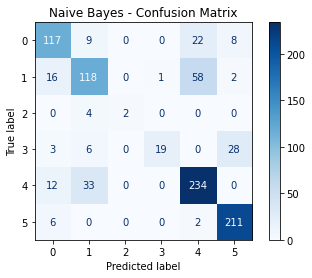

In [239]:


# Compute and plot confusion matrix
cm = confusion_matrix(y_test, y_predict)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Naive Bayes - Confusion Matrix")
plt.show()

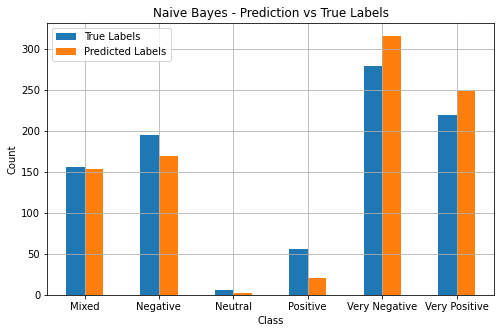

In [240]:
# Convert predictions to DataFrame
pred_df = pd.DataFrame({'Predicted': y_predict})
true_df = pd.DataFrame({'True': y_test})

# Bar plot for predicted vs true labels
pred_counts = pred_df['Predicted'].value_counts().sort_index()
true_counts = true_df['True'].value_counts().sort_index()

df_counts = pd.DataFrame({
    'True Labels': true_counts,
    'Predicted Labels': pred_counts
})

df_counts.plot(kind='bar', figsize=(8, 5))
plt.title("Naive Bayes - Prediction vs True Labels")
plt.xlabel("Class")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

## Now we are going to try an improve the recall score using Randomforest and compare it to Naive Bayes

In [241]:
##Now we are going to try an improve the recall score using Randomforest 

##now I am creating a list to store the evaluation metric 
prec_score1, reca_score1, f1_sco1 =[],[],[]

#we are recretaing the loop to split and go through each fold
##I created Loop over each train-test spilt

for train_data1 , test_data1 in cf.split(X):
    ##Split data into training and test set

    X_train1, X_test1 =X[train_data1], X[test_data1]
    y_train1, y_test1 =y.iloc[train_data1],y.iloc[test_data1] ##I created this to split the labels 



    model2 = RandomForestClassifier(
        n_estimators =200,
        max_depth =15,
        min_samples_split =2,
        class_weight= 'balanced',
        random_state=42
    )



    ##now we train the random forest model

    model2 =RandomForestClassifier(n_estimators=100, random_state=42)
    model2.fit(X_train1,y_train1)

  

    ##make prediction on the test set
    y_predict1 = model2.predict(X_test1)

    ##Evaluate precision, recall and F1-score

    precision_score1,recall_score1,f1_score1,_ = precision_recall_fscore_support(
        y_test1,y_predict1, average='macro', zero_division= 0

    )
    



In [242]:
prec_score1.append(precision_score)
reca_score1.append(recall_score)
f1_sco1.append(f1_score)

In [243]:
##now we are going to calculate and display the average metric among the 5 folds
print(f"Average Precision :{sum(prec_score1)/len(prec_score1):.3f}")

print(f"Average Recall:{sum(reca_score1)/len(reca_score1):.3f}")

print(f"F_1 Score :{sum(f1_sco1)/len(f1_sco1):.3f}")

Average Precision :0.832
Average Recall:0.638
F_1 Score :0.682


## Now We are going to see if there is changes after filtering stopwords with the Naive Bayes

In [244]:
##now I MA GOING TO TRY THIS USING Stopword Filtering

##now I am defining stopwords

stop_words =set(stopwords.words('english'))

In [245]:
#Now we do some text processing function
def process_1 (text_data):

    text_data = text_data.lower()
    text_data = re.sub(r"http\S+|www\S+", "", text_data)
    text_data= re.sub(r"[^a-z\s]", "", text_data)
    text_data = re.sub(r"\s+", " ", text_data).strip()
    return text_data

#now I am creating a function for stopwords removal
def remove_stopwords(text):
    tokens = word_tokenize(text)
    return ' '.join([w for w in tokens if w.lower() not in stop_words])

In [246]:
df1.columns =['text','sentimentlabel']

In [247]:
df1['text_cleaned_stop_word'] = df1['text'].apply(process_1).apply(remove_stopwords)

In [248]:
print(df1)

                                                   text sentimentlabel  \
0     .have a smaller window of time in which the th...       Negative   
1     .have a smaller window of time in which the th...       Negative   
2     1. Give me flexibility in scheduling appointme...  Very Negative   
3     1. Give me flexibility in scheduling appointme...  Very Negative   
4     1. Give me flexibility in scheduling appointme...  Very Negative   
...                                                 ...            ...   
4582  Zero my balance on my account because Iâm no...  Very Negative   
4583  Zero my balance on my account because Iâm no...  Very Negative   
4584  Zero my balance on my account because Iâm no...  Very Negative   
4585  Zero my balance on my account because Iâm no...  Very Negative   
4586  Zero my balance on my account because Iâm no...  Very Negative   

                                 text_cleaned_stop_word  
0      smaller window time field representative arriv

In [249]:
#step 2: Feature Extraction
#Unigram Bag of words

vectorizer =CountVectorizer(max_features =2000)
X1 = vectorizer.fit_transform(df1['text_cleaned_stop_word'])
y1 = df1['sentimentlabel']

In [250]:
##Now we intiate the 5-Fold CRoss-Validation
cf2 =KFold(n_splits =5,shuffle =True,random_state =42)

##now I am creating a list to store the evaluation metric 
prec_score2, reca_score2, f1_sco2 =[],[],[]


In [251]:
##I created Loop over each train-test spilt
for train_data , test_data in cf2.split(X1):
    ##Split data into training and test set

    X_train2, X_test2 =X1[train_data], X1[test_data]
    y_train2, y_test2 =y1.iloc[train_data],y1.iloc[test_data] ##I created this to split the labels 


    #now we train the Naive Bayes classifier
    model2 = MultinomialNB()
    
    model2.fit(X_train2,y_train2)

    ##make prediction on the test set
    y_predict2 = model2.predict(X_test2)

    ##Evaluate precision, recall and F1-score

    precision_score2,recall_score2,f1_score2,_ = precision_recall_fscore_support(
        y_test2,y_predict2, average='macro', zero_division= 0
    )

In [252]:


prec_score2.append(precision_score)
reca_score2.append(recall_score)
f1_sco2.append(f1_score)

In [253]:
##now we are going to calculate and display the average metric among the 5 folds
print(f"Average Precision :{sum(prec_score2)/len(prec_score2):.3f}")

print(f"Average Recall:{sum(reca_score2)/len(reca_score2):.3f}")

print(f"F_1 Score :{sum(f1_sco2)/len(f1_sco2):.3f}")

Average Precision :0.832
Average Recall:0.638
F_1 Score :0.682
